#### Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we have a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, will be working with some auto insurance data to demonstrate how can we create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading a dataset
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Here,we got dependent variable as "fraud_reported" column which consists of "Y" or "N" values.

In [3]:
#to check how many rows and columns in dataframe
df.shape

(1000, 40)

In [4]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [5]:
df.duplicated().sum()  #to check with duplicate records

0

In [6]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

there are more records on "N"

In [7]:
#to get statistics information
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


with above information,we can see there no missing values in any column and we can also observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [8]:
#to check whether any null values present in dataframe
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
#Droping last column "_c39" as it containing a all null values.

df = df.drop(["_c39"],axis=1)

## EDA

Text(0.5, 1.0, 'histogram of fraud_reported')

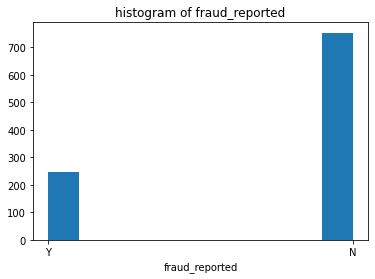

In [15]:
#visualize "fraud_reported" with histogram

plt.hist(df['fraud_reported'])
plt.xlabel('fraud_reported')
plt.title('histogram of fraud_reported')

we can clearly see that "N" values are more occuring then "Y" values. SO,we can deal with this kind of imbalanced data by using a F1-score as our metrics evaluation method while training the model

In [16]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

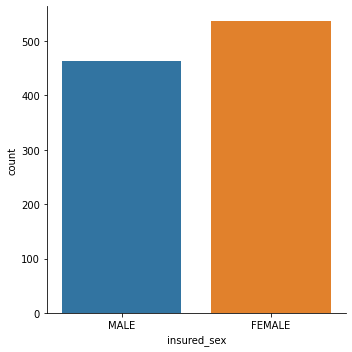

In [18]:
sns.factorplot('insured_sex', data=df, kind="count") ## Let's check Gender

So,both male and female almost at a same rate claiming insurance.

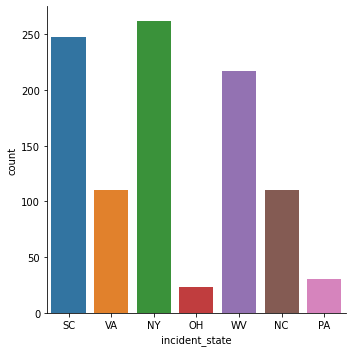

In [28]:
sns.factorplot('incident_state', data=df, kind="count")

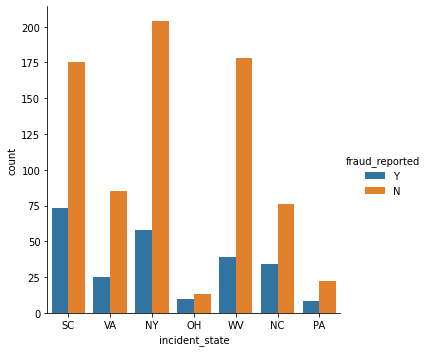

In [22]:
sns.factorplot('incident_state', data=df, kind="count", hue='fraud_reported')

Looks like in every state few fraud insurance claims can be observed.

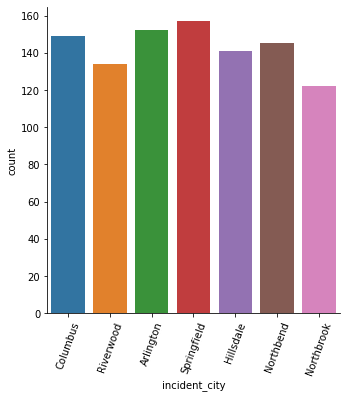

In [26]:
a = sns.factorplot('incident_city', data=df, kind="count")
a.set_xticklabels(rotation=70)

So,its totally distributed across all cities.

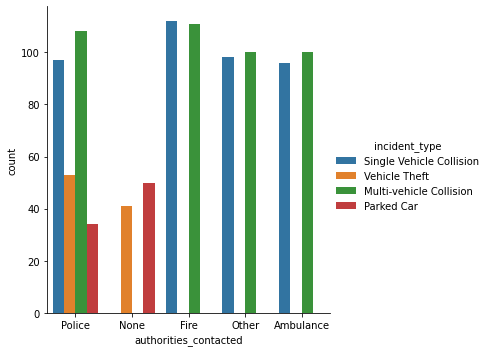

In [50]:
sns.factorplot('authorities_contacted', data=df, kind="count", hue='incident_type')

So,mostly for "Vehicle theft" and "Parked car" contacted by police and most other times no one is contacted.

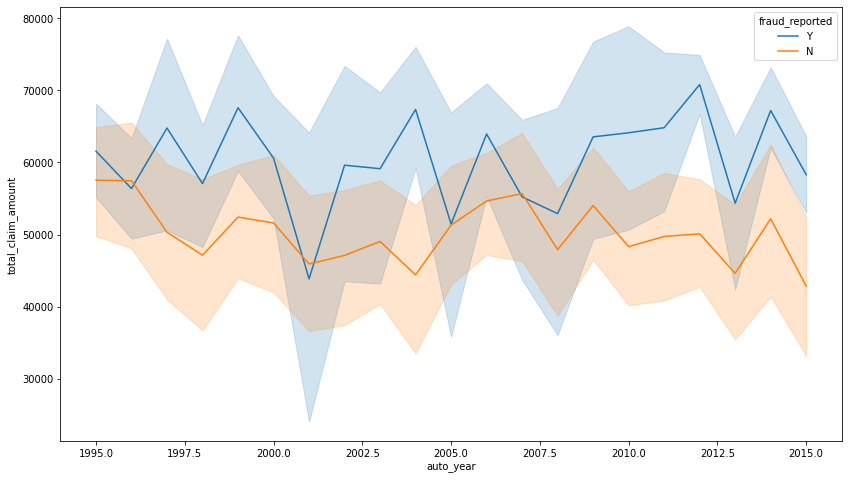

In [63]:

plt.figure(figsize=(14,8))
sns.lineplot(x="auto_year", y="total_claim_amount", hue='fraud_reported', data=df)
plt.show()

So,in every year fraud_reported as "yes" for total_claim_amount was always greater then total_claim_amount of fraud_repored as "No" 

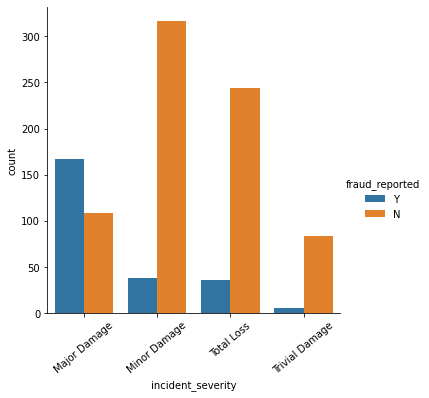

In [60]:
a = sns.factorplot('incident_severity', data=df, kind="count", hue='fraud_reported')
a.set_xticklabels(rotation=40)

With above observation,most of the fraud_reported as "N" for all types of "incident_severity" except for "Major Damage" where more fraud_reported as "Y" compared to "N".

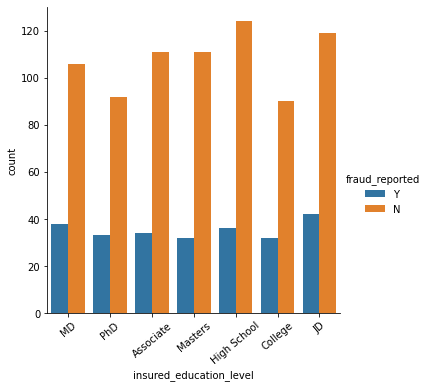

In [78]:
a = sns.factorplot('insured_education_level', data=df, kind="count", hue='fraud_reported')
a.set_xticklabels(rotation=40)

So,its equally distributed in above scenario.

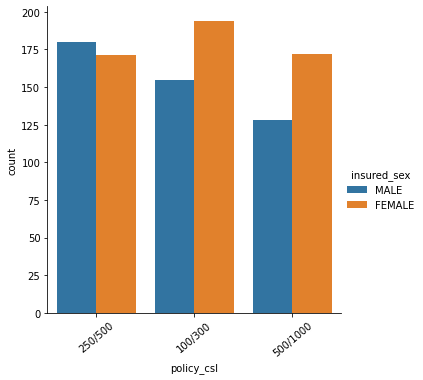

In [79]:
a = sns.factorplot('policy_csl', data=df, kind="count", hue='insured_sex')
a.set_xticklabels(rotation=40)

In two policy_csl female records are more compared to male wheras under "250/500" policy_csl male records are more compared to female.

In [83]:
#convertng policy_bind_date into day,month and year columns 

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors='coerce') #converting to a datetime type

df['p_Year']  = df['policy_bind_date'].dt.year
df['p_Month'] = df['policy_bind_date'].dt.month
df['p_Day']   = df['policy_bind_date'].dt.day

In [84]:
#convertng incident_date into day,month and year columns as well

df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce') #converting to a datetime type

df['I_Year']  = df['incident_date'].dt.year
df['I_Month'] = df['incident_date'].dt.month
df['I_Day']   = df['incident_date'].dt.day

In [85]:
#Now,Droping those date columns from dataframe

df = df.drop(["policy_bind_date","incident_date"],axis=1)

In [90]:
#Since there are objective type columns,so we can use Label encoder method.

from sklearn.preprocessing import LabelEncoder

df['policy_state'] = LabelEncoder().fit_transform(df['policy_state'])
df['policy_csl'] = LabelEncoder().fit_transform(df['policy_csl'])
df['insured_sex'] = LabelEncoder().fit_transform(df['insured_sex'])
df['insured_education_level'] = LabelEncoder().fit_transform(df['insured_education_level'])
df['insured_occupation'] = LabelEncoder().fit_transform(df['insured_occupation'])
df['insured_hobbies'] = LabelEncoder().fit_transform(df['insured_hobbies'])
df['insured_relationship'] = LabelEncoder().fit_transform(df['insured_relationship'])
df['incident_type'] = LabelEncoder().fit_transform(df['incident_type'])

df['collision_type'] = LabelEncoder().fit_transform(df['collision_type'])
df['incident_severity'] = LabelEncoder().fit_transform(df['incident_severity'])
df['authorities_contacted'] = LabelEncoder().fit_transform(df['authorities_contacted'])
df['incident_state'] = LabelEncoder().fit_transform(df['incident_state'])
df['incident_city'] = LabelEncoder().fit_transform(df['incident_city'])
df['incident_location'] = LabelEncoder().fit_transform(df['incident_location'])
df['property_damage'] = LabelEncoder().fit_transform(df['property_damage'])
df['police_report_available'] = LabelEncoder().fit_transform(df['police_report_available'])

df['auto_make'] = LabelEncoder().fit_transform(df['auto_make'])
df['auto_model'] = LabelEncoder().fit_transform(df['auto_model'])
df['fraud_reported'] = LabelEncoder().fit_transform(df['fraud_reported'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int64  
 4   policy_csl                   1000 non-null   int64  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int64  
 10  insured_education_level      1000 non-null   int64  
 11  insured_occupation           1000 non-null   int64  
 12  insured_hobbies              1000 non-null   int64  
 13  insured_relationshi

So,now there are no objective type columns present in dataframe.

## Correlation

In [92]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,p_Year,p_Month,p_Day,I_Year,I_Month,I_Day
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.017824,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.070639,0.014736,0.007040,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.048276,0.005750,0.051728,NaN,0.024659,-0.011092
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.018672,-0.058439,0.015417,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.001486,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,-0.037444,0.015501,0.053869,NaN,0.023404,-0.006131
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,0.039896,0.017120,0.009802,-0.005669,0.001742,-0.013402,-0.015719,0.018565,-0.010064,-0.035406,0.016393,0.000113,0.013432,0.005575,-0.004558,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443,-0.040099,0.005509,0.041885,NaN,-0.042512,0.057199
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.034739,-0.026377,-0.016777,0.008723,-0.002077,0.029534,0.029457,-0.042263,0.008623,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.007276,0.071450,0.002277,NaN,0.023643,0.014745
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,-0.036687,0.022530,0.056182,0.032814,0.009333,0.047704,-0.001869,-0.019403,-0.027340,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.016466,-0.045345,0.018973,NaN,-0.011794,-0.004156
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.033182,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.060935,0.051214,0.016900,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.049598,-0.050416,0.009164,NaN,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036719,-0.011155,-0.055191,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.095359,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,0.001249,-0.035355,-0.025183,NaN,0.021559,0.014835
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,-0.025913,0.009466,0.029044,-0.077492,0.013094,0.014510,-0.023257,-0.021270,-0.056957,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.048008,0.009961,-0.045207,NaN,0.042409,-0.021716
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0

In [93]:
#with target variable
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
I_Day                         -0.044151
incident_city                 -0.040403
policy_csl                    -0.037190
p_Month                       -0.030829
property_damage               -0.030497
policy_number                 -0.029443
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
p_Year                        -0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
I_Month                        0.014495


In [96]:
#lets drop "I_Year" from dataframe which has nan correlation
df = df.drop(["I_Year"],axis=1)

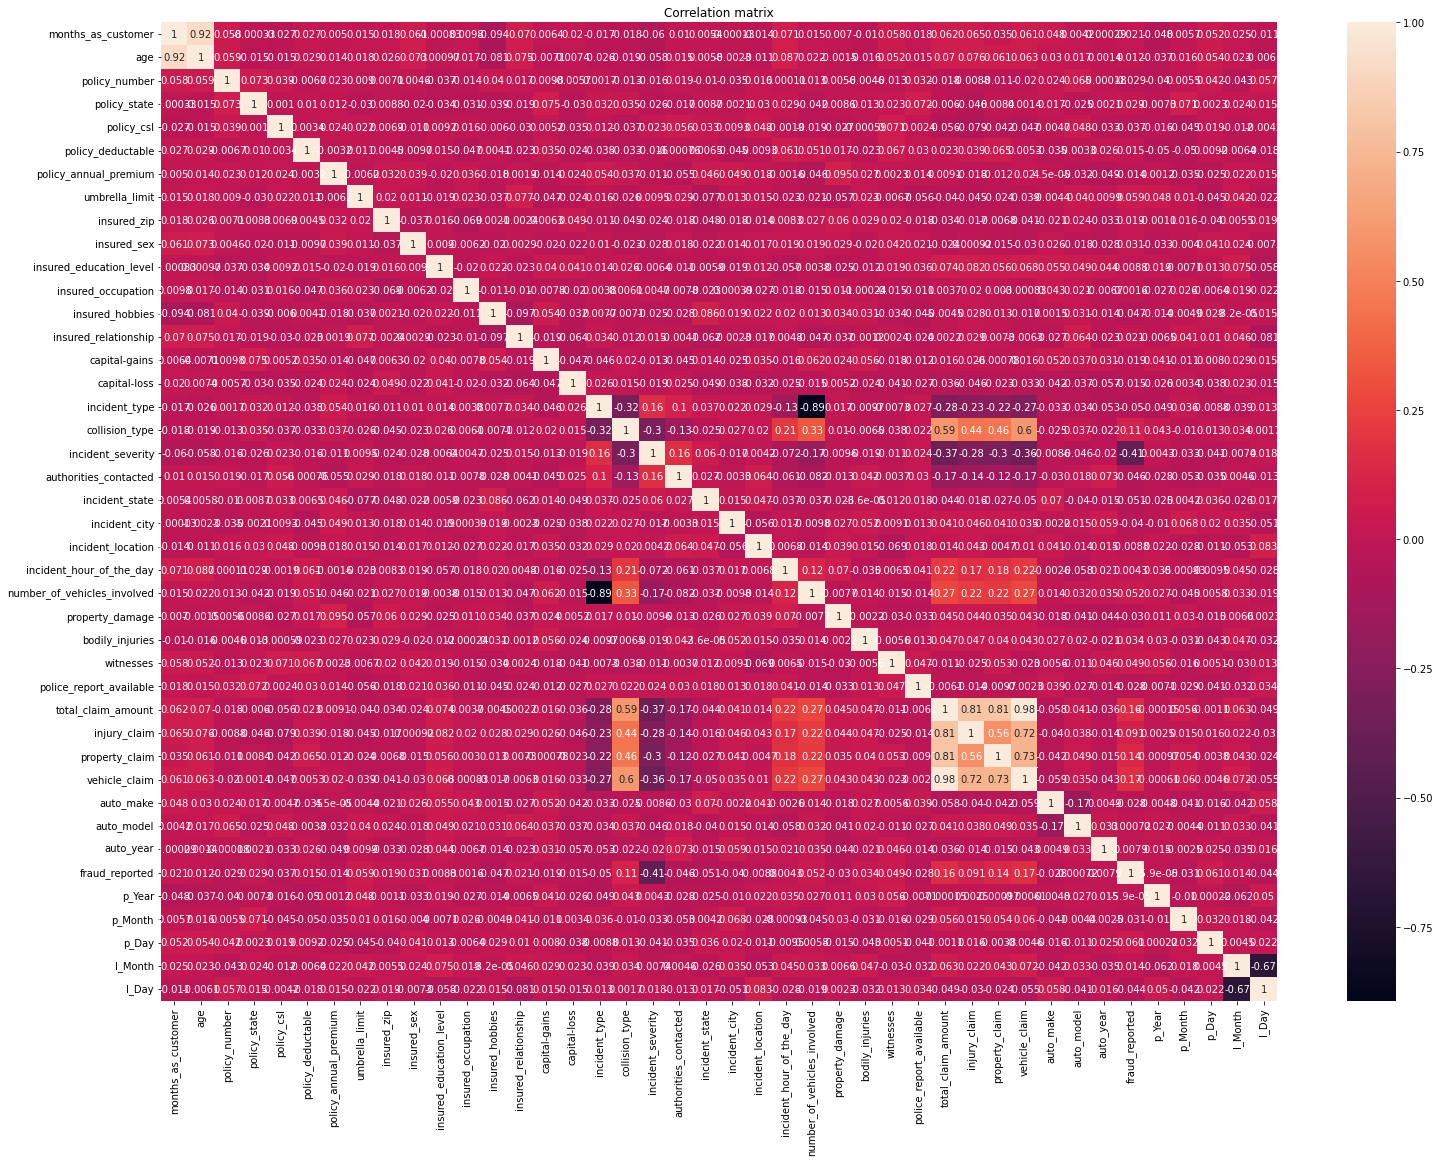

In [97]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[25,18])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### with this,there are both positive and negativs correlations with target variable,
#### 1)"incident_severity" has highest negative correlation(41%) w.r.t target variable.
#### 2)both "p_year" and "incident_location" contains a least negative correlation(<1%) with target variable.
#### 3)"vehicle_claim" has highest positive correlation(17%).
#### 4)columns like "insured_education_level","auto_year","incident_hour_of_the_day","insured_occupation","auto_model" all have least positive correlation(<1%).

## Checking with outliers

In [99]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:16]
df3 = df.iloc[:,16:24]
df4 = df.iloc[:,24:32]
df5 = df.iloc[:,32:38]
df6 = df.iloc[:,38:]

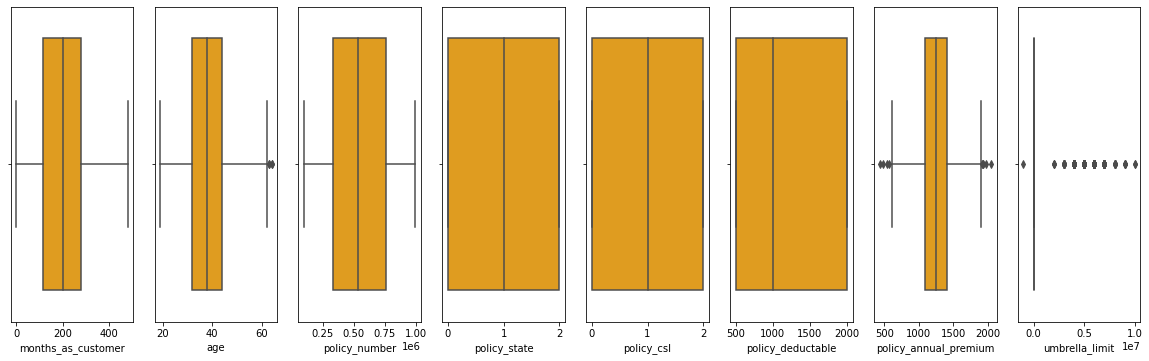

In [100]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,few outliers present in "umbrella_limit" and "price_annual_premium" in above observation.

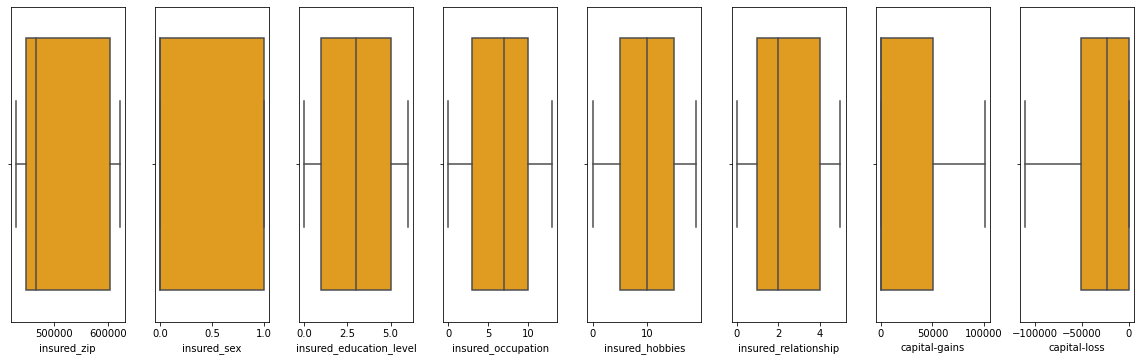

In [101]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,no outliers in above observation.

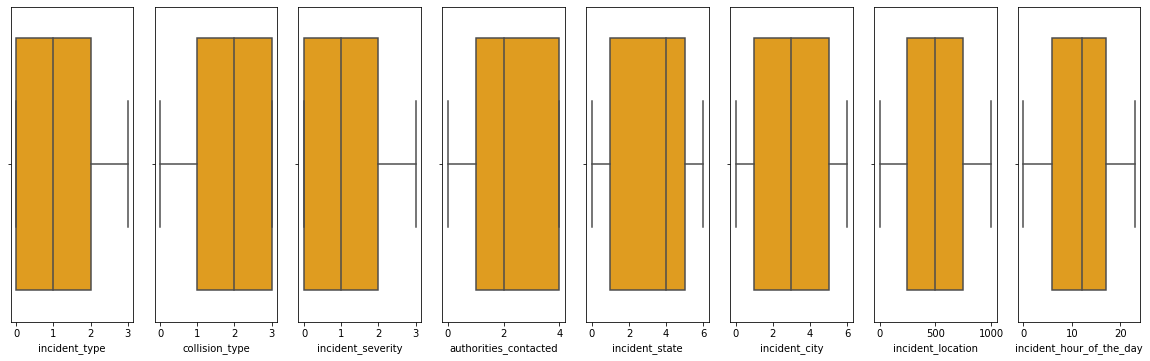

In [102]:
column_list = df3.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

No outliers present in above observation

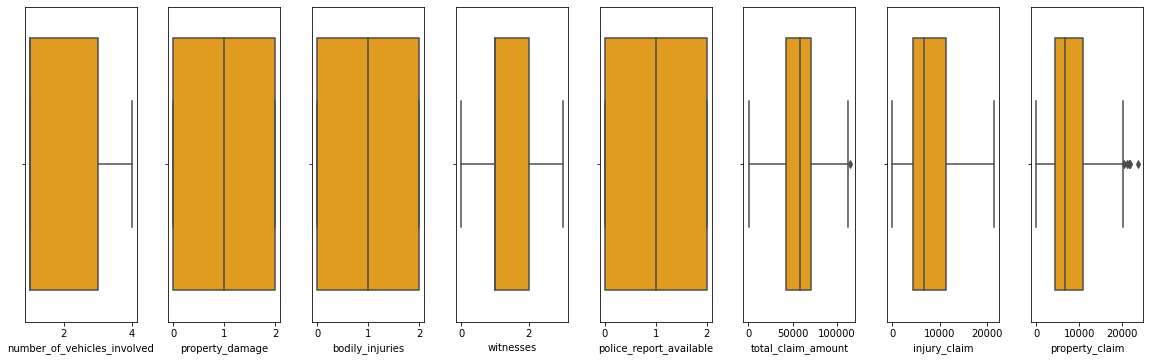

In [103]:
column_list = df4.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

SO,few outliers present in "property_claim" in above observation.

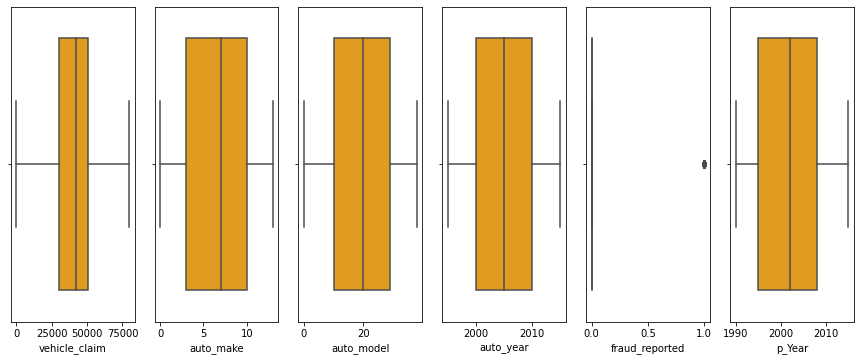

In [104]:
column_list = df5.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

No outliers present in above observation.

## checking with Skewness

In [105]:
df.skew().sort_values()

vehicle_claim                 -0.621098
total_claim_amount            -0.594582
capital-loss                  -0.391472
collision_type                -0.193345
incident_state                -0.148865
authorities_contacted         -0.121744
auto_model                    -0.080773
insured_hobbies               -0.061563
insured_occupation            -0.058881
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
p_Month                       -0.029321
policy_state                  -0.026177
auto_make                     -0.018797
insured_education_level       -0.000148
incident_location              0.000000
policy_annual_premium          0.004402
bodily_injuries                0.014777
witnesses                      0.019636
p_Day                          0.024372
policy_number                  0.038991
incident_city                  0.049531
p_Year                         0.052511
police_report_available        0.052967
I_Day                          0.059111


So,there is more skewness in "I_Month" and "umbrella_limit" compared to other columns.

## Removing the outliers

In [106]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(1000, 42)

In [107]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(1000, 42)
(980, 42)
20


## calcuating the percentage of data loss

In [108]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:2.00%


there is a 2% data loss which is good to proceed for further.

## Dividing the data into features and vectors

In [125]:
y = df_new[["fraud_reported"]]
x = df_new.drop(["fraud_reported"],axis=1)

## Checking with multicollinearity

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [127]:
calc_vif_value(x)

,variables,VIF
0,months_as_customer,2.865186e+01
1,age,1.318636e+02
2,policy_number,5.682293e+00
3,policy_state,2.622859e+00
4,policy_csl,2.459137e+00
5,policy_deductable,4.681912e+00
6,policy_annual_premium,2.930298e+01
7,umbrella_limit,1.267335e+00
8,insured_zip,5.207185e+01
9,insured_sex,1.925674e+00


So,all values are in desirable range.

## Transforming data to eliminate skewness

In [128]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[ 1.04454111e+00,  1.00233050e+00, -2.34749258e-02,
         1.14147704e+00,  1.89051047e-01,  6.31539602e-02,
         6.23998657e-01, -3.37085784e-01,  0.00000000e+00,
         1.07197146e+00,  5.71955048e-01, -1.15245232e+00,
         1.22184631e+00, -1.56514350e+00,  1.02898949e+00,
         1.04851566e+00,  8.19661745e-01,  1.25204591e+00,
        -1.36954697e+00,  1.15685881e+00,  4.01673060e-01,
        -9.42160223e-01,  1.54683368e+00, -9.16935309e-01,
        -8.39387415e-01,  1.22153773e+00,  9.48945724e-02,
         5.23536455e-01,  1.20601970e+00,  7.20163042e-01,
         8.58172429e-03,  1.08980208e+00,  7.58129800e-01,
         8.54811640e-01, -1.80721231e+00, -2.04435079e-01,
         2.42583731e-14,  1.00185075e+00,  2.53108225e-01,
        -1.10063737e+00,  1.04673562e+00],
       [ 2.99045493e-01,  4.27171405e-01, -7.44012211e-01,
         5.90021935e-02,  1.89051047e-01,  1.27180775e+00,
        -2.41074685e-01,  1.48245456e+00,  0.00000000e+00,
         1.07

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[ 1.04454111,  1.0023305 , -0.02347493,  1.14147704,  0.18905105,
         0.06315396,  0.62399866, -0.33708578,  0.        ,  1.07197146,
         0.57195505, -1.15245232,  1.22184631, -1.5651435 ,  1.02898949,
         1.04851566,  0.81966175,  1.25204591, -1.36954697,  1.15685881,
         0.40167306, -0.94216022,  1.54683368, -0.91693531, -0.83938741,
         1.22153773,  0.09489457,  0.52353646,  1.2060197 ,  0.72016304,
         0.00858172,  1.08980208,  0.7581298 ,  0.85481164, -1.80721231,
        -0.20443508,  1.66880299,  1.00185075,  0.25310822, -1.10063737,
         1.04673562],
       [ 0.29904549,  0.4271714 , -0.74401221,  0.05900219,  0.18905105,
         1.27180775, -0.24107468,  1.48245456,  0.        ,  1.07197146,
         0.57195505, -0.08633539,  0.91574197, -0.14886986, -0.98662742,
         1.04851566,  1.44260173, -1.57391305, -0.06708031,  1.15685881,
         0.82108674,  0.97787608,  0.49927084, -0.44763644, -0.83938741,
        -1.2184473 , -1.26494

In [130]:
x_n1 = pd.DataFrame(x) #to check with skewness again
x_n1.skew()

0    -0.133972
1    -0.002183
2    -0.161791
3    -0.150765
4    -0.096814
5     0.022179
6    -0.007258
7    -7.932397
8     0.000000
9     0.139324
10   -0.187642
11   -0.238129
12   -0.248575
13   -0.160168
14    0.031294
15    0.088750
16   -0.095572
17   -0.204055
18   -0.079569
19   -0.223816
20   -0.256064
21   -0.181833
22   -0.288690
23   -0.258027
24    0.372833
25   -0.093063
26   -0.133824
27   -0.151669
28   -0.117961
29   -0.508540
30   -0.416732
31   -0.357397
32   -0.521805
33   -0.229846
34   -0.276099
35   -0.013973
36    0.045199
37   -0.171033
38   -0.210280
39    0.306287
40   -0.225405
dtype: float64

So,for all columns skewness has been removed significantly except for 7th column("umbrella_limit") where it has increased.

In [131]:
#Since "umbrella_limit" has highest skewness also contains outliers along with that it has least correlation with target variable.
#So,we can drop that column.

x = df_new.drop(["fraud_reported","umbrella_limit"],axis=1)

In [135]:
from sklearn.preprocessing import power_transform
x = power_transform(x)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [136]:
x_n1 = pd.DataFrame(x) #to check with skewness again
x_n1.skew()

0     0.006904
1     0.002513
2    -0.009642
3    -0.019589
4     0.018568
5     0.017180
6     0.005918
7     0.000000
8     0.139324
9    -0.007088
10   -0.007637
11   -0.006406
12   -0.006315
13    0.030220
14    0.082275
15   -0.000497
16   -0.008231
17    0.012765
18   -0.034836
19   -0.004567
20   -0.012057
21   -0.013495
22   -0.009272
23    0.344154
24    0.016793
25   -0.005789
26   -0.011367
27    0.006107
28    0.062446
29   -0.002143
30    0.011258
31    0.064336
32   -0.012766
33   -0.006064
34    0.001249
35    0.014833
36   -0.007472
37   -0.008672
38    0.050267
39   -0.028861
dtype: float64

## Selecting a best random state

In [137]:
#importing a necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.8316326530612245  on Random state  9


In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 9)

In [139]:
print(x_train.shape,y_train.shape)

(784, 40) (784, 1)


In [140]:
print(x_test.shape,y_test.shape)

(196, 40) (196, 1)


In [141]:
# To predict the Loan_status,we can consider Logistic regressiom model
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_1)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_1)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_1))
print(classification_report(y_test,predic_1))

accuracy_score is 0.832
f1_score is 0.582
[[140  15]
 [ 18  23]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       155
           1       0.61      0.56      0.58        41

    accuracy                           0.83       196
   macro avg       0.75      0.73      0.74       196
weighted avg       0.83      0.83      0.83       196



In [142]:
#using DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predic_2 = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_2)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_2)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_2))
print(classification_report(y_test,predic_2))

accuracy_score is 0.781
f1_score is 0.494
[[132  23]
 [ 20  21]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       155
           1       0.48      0.51      0.49        41

    accuracy                           0.78       196
   macro avg       0.67      0.68      0.68       196
weighted avg       0.79      0.78      0.78       196



In [143]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic_3 = KN.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_3)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_3)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_3))
print(classification_report(y_test,predic_3))

accuracy_score is 0.781
f1_score is 0.338
[[142  13]
 [ 30  11]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       155
           1       0.46      0.27      0.34        41

    accuracy                           0.78       196
   macro avg       0.64      0.59      0.60       196
weighted avg       0.75      0.78      0.76       196



In [144]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic_4 = RF.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_4)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_4)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

accuracy_score is 0.837
f1_score is 0.543
[[145  10]
 [ 22  19]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       155
           1       0.66      0.46      0.54        41

    accuracy                           0.84       196
   macro avg       0.76      0.70      0.72       196
weighted avg       0.82      0.84      0.83       196



f1_score is high for logistic regression model

## Cross Validation to check with overfitting

In [145]:
from sklearn.model_selection import cross_val_score

#for Logistic regression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Logistics regression model : ",L_cr.mean())

cross validation for Logistics regression model :  0.7724489795918367


In [146]:
L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.7418367346938777


In [147]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.7683673469387755


In [148]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.7642857142857142


here also,the CV score is more for Logstic regression model. So, I will take my final model as logistic regression model

## Hyper parameter tuning

In [149]:
from sklearn.model_selection import GridSearchCV

params_list = {'penalty':['l1','l2','elasticnet','none'],
               'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
               'multi_class':['auto','ovr','multinomial'],
               'C':[100, 10, 1.0, 0.1, 0.01]
               }
GCV = GridSearchCV(LogisticRegression(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'C': 100, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'sag'}

In [150]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
print("accuarcy_score is",accuracy_score(y_test,GCV_predic))
print("f1_score is",f1_score(y_test,GCV_predic))

accuarcy_score is 0.8316326530612245
f1_score is 0.5822784810126583


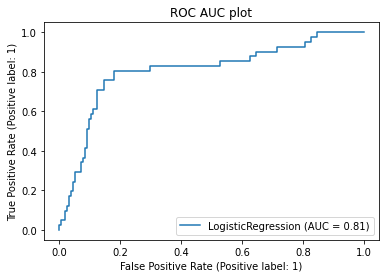

In [151]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

from the above graph we got AUC score is 81%

In [152]:
import joblib
joblib.dump(GCV.best_estimator_,"Insurance_Claims_Fraud_Detection.pkl")

['Insurance_Claims_Fraud_Detection.pkl']